In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("/content/MRTSSM448USN.csv",parse_dates=True,index_col="DATE")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1992-01-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MRTSSM448USN  348 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


In [4]:
df

,MRTSSM448USN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2020-08-01,18138
2020-09-01,18031
2020-10-01,19187


In [5]:
df.columns = ["Sales"]

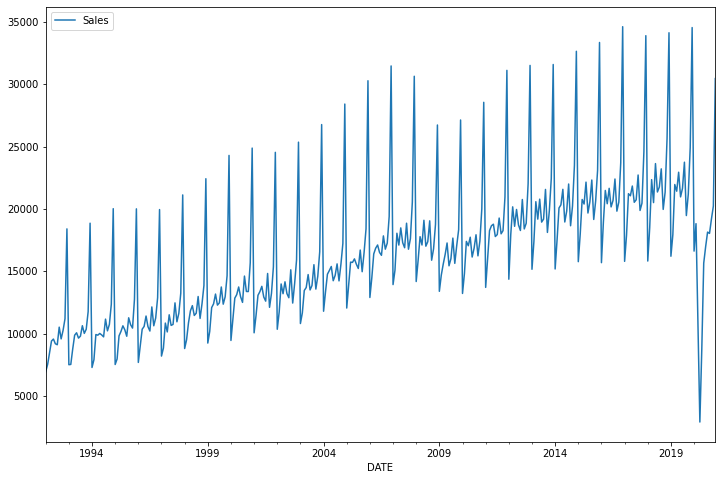

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

348

In [8]:
len(df) - 18

330

In [9]:
test_size = 18
test_ind = len(df) - test_size

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-02-01,17932
2019-03-01,21953
2019-04-01,21416


In [12]:
test

,Sales
DATE,
2019-07-01,21650
2019-08-01,23743
2019-09-01,19464
2019-10-01,21177
2019-11-01,24928
2019-12-01,34541
2020-01-01,16612
2020-02-01,18813
2020-03-01,10833


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
scaled_train = scaler.transform(train)

In [17]:
scaled_test= scaler.transform(test)

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
len(test)

18

In [20]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = 1)

In [21]:
X,y = generator[0]

In [22]:
len(X)

1

In [23]:
scaled_train

array([[0.        ],
       [0.02117588],
       [0.0555415 ],
       [0.08900372],
       [0.09467712],
       [0.08108987],
       [0.0782351 ],
       [0.12918729],
       [0.09521917],
       [0.11982799],
       [0.15354316],
       [0.41401366],
       [0.02038088],
       [0.02117588],
       [0.06605717],
       [0.10584324],
       [0.11292596],
       [0.09745962],
       [0.10320529],
       [0.13334297],
       [0.11111914],
       [0.12315253],
       [0.17424927],
       [0.43049182],
       [0.01235862],
       [0.0348354 ],
       [0.1077946 ],
       [0.10591551],
       [0.1109746 ],
       [0.10678278],
       [0.10107325],
       [0.15245908],
       [0.11849095],
       [0.13702887],
       [0.19571423],
       [0.47259061],
       [0.02095906],
       [0.03696744],
       [0.10396415],
       [0.11672027],
       [0.13305388],
       [0.1215264 ],
       [0.10284393],
       [0.15632566],
       [0.13630615],
       [0.12651321],
       [0.21006035],
       [0.472

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense,LSTM

In [26]:
n_features = 1

In [27]:
model = Sequential()

In [28]:
model.add(LSTM(100,activation="relu",input_shape = (length,n_features)))

In [29]:
model.add(Dense(1))

In [30]:
model.compile(optimizer="adam",loss = "mse")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor="val_loss",patience = 2)

In [34]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size = 1)

In [35]:
model.fit_generator(generator,epochs = 20,validation_data = validation_generator,callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


318/318 [==============================] - 4s 7ms/step - loss: 0.0393 - val_loss: 0.0473
Epoch 2/20
318/318 [==============================] - 2s 6ms/step - loss: 0.0166 - val_loss: 0.0241
Epoch 3/20
318/318 [==============================] - 2s 5ms/step - loss: 0.0127 - val_loss: 0.0072
Epoch 4/20
318/318 [==============================] - 2s 5ms/step - loss: 0.0075 - val_loss: 0.0163
Epoch 5/20
318/318 [==============================] - 2s 5ms/step - loss: 0.0018 - val_loss: 0.0099


In [36]:
losses = pd.DataFrame(model.history.history)

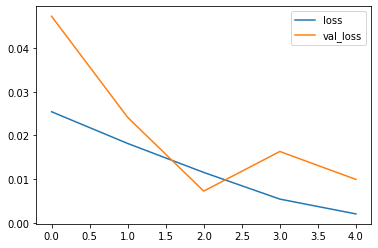

In [37]:
losses.plot()

In [40]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch= first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [44]:
true_predictions = scaler.inverse_transform(test_predictions)

In [45]:
test["Predicitions"] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


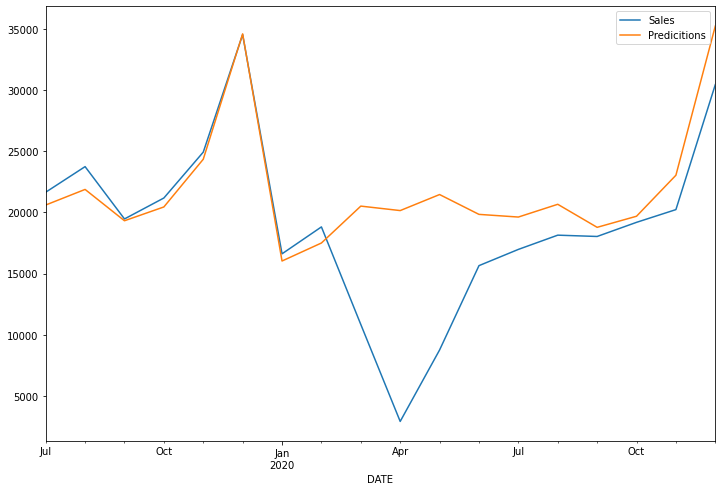

In [46]:
test.plot(figsize = (12,8))

In [47]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [48]:
length = 12

In [50]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length,batch_size = 1)

In [51]:
model = Sequential()
model.add(LSTM(100,activation = "relu" , input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam",loss = "mse")

model.fit_generator(generator,epochs = 8)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
336/336 [==============================] - 3s 6ms/step - loss: 0.0391
Epoch 2/8
336/336 [==============================] - 2s 5ms/step - loss: 0.0168
Epoch 3/8
336/336 [==============================] - 2s 6ms/step - loss: 0.0089
Epoch 4/8
336/336 [==============================] - 2s 5ms/step - loss: 0.0069
Epoch 5/8
336/336 [==============================] - 2s 5ms/step - loss: 0.0060
Epoch 6/8
336/336 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 7/8
336/336 [==============================] - 2s 5ms/step - loss: 0.0036
Epoch 8/8
336/336 [==============================] - 2s 5ms/step - loss: 0.0033


In [53]:
forecast = []

periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)


In [55]:
forecast = scaler.inverse_transform(forecast)

In [57]:
forecast

array([[19281.95863354],
       [20181.18512517],
       [16067.1139496 ],
       [15568.30040258],
       [16019.09547168],
       [17656.46091062],
       [18452.01519173],
       [19230.71220285],
       [19374.11115974],
       [20102.20996982],
       [21310.83334357],
       [27837.21284527]])

In [58]:
forecast_index = pd.date_range(start = "2019-11-01",periods= periods,freq ="MS")

In [59]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [60]:
forecast_df = pd.DataFrame(data=forecast,index = forecast_index,columns =["Forecast"])

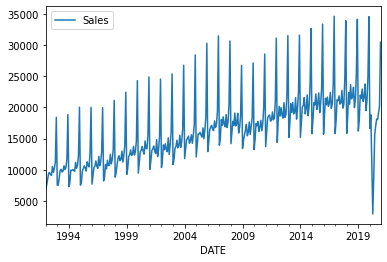

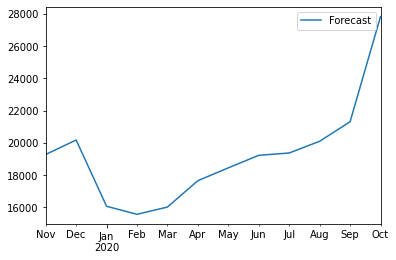

In [61]:
df.plot()
forecast_df.plot()

(588.0, 611.0)

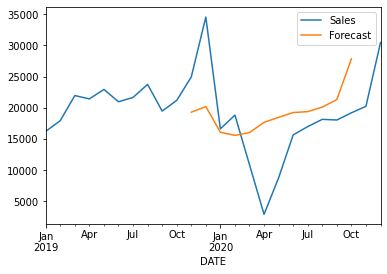

In [62]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim("2019-01-01","2020-12-01")